In [26]:
import pandas as pd
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
pd.set_option('display.max_columns', None)
data = pd.read_excel(r"C:\Users\milan\OneDrive\Documenti\dat_iniziali_analisi_python.xlsx")
data

,Player,Nation,Pos,Squad,Age,Annual Wages
0,Dušan Vlahović,rs SRB,FW,Juventus,23,"€ 12,960,000"
1,Victor Osimhen,ng NGA,FW,Napoli,24,"€ 12,820,000"
2,Wojciech Szczęsny,pl POL,GK,Juventus,33,"€ 12,040,000"
3,Alex Sandro,br BRA,DF,Juventus,32,"€ 11,110,000"
4,Hakan Çalhanoğlu,tr TUR,MF,Inter,29,"€ 11,110,000"
...,...,...,...,...,...,...
615,Medon Berisha,NaN,CM,Lecce,20,NaN
616,Patrick Dorgu,NaN,LB,Lecce,18,NaN
617,Valentin Gendrey,fr FRA,DF,Lecce,23,NaN
618,Zinedin Smajlovic,NaN,CB,Lecce,19,NaN


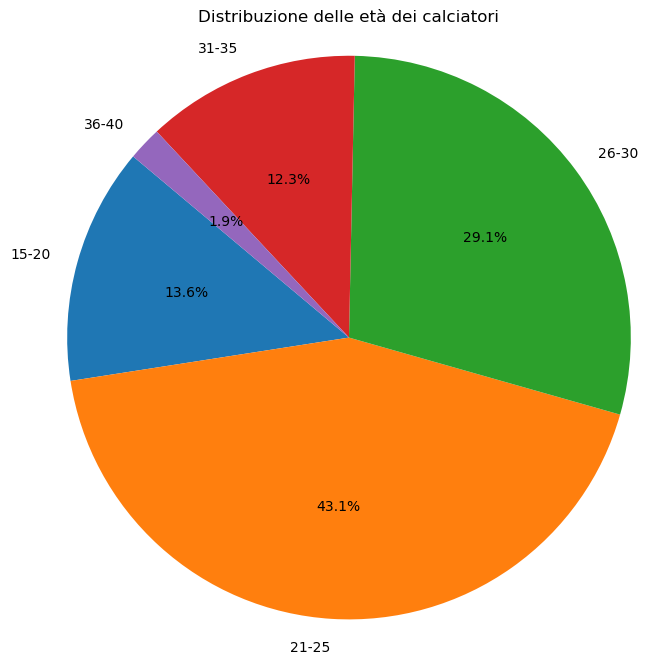

In [28]:
eta = data.iloc[:, 4]

# Definisci le fasce di età
bins = [15, 20, 25, 30, 35, 40]
labels = ['15-20', '21-25', '26-30', '31-35', '36-40']

# Categorizza le età nelle fasce specificate
eta_bins = pd.cut(eta, bins=bins, labels=labels, right=True, include_lowest=True)

# Conta il numero di difensori in ciascuna fascia
eta_counts = eta_bins.value_counts().sort_index()

# Crea il diagramma a torta
plt.figure(figsize=(8, 8))
plt.pie(eta_counts, labels=eta_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuzione delle età dei calciatori')
plt.axis('equal')  # Per rendere il diagramma a torta circolare



# Aggiungi la legenda
ax.legend([f"{label} - {int(count)} ({pct:.1f}%)" for label, count, pct in zip(eta_counts.index, eta_counts, 100*eta_counts/eta_counts.sum())], title="Fasce d'età", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Mostra il diagramma a torta
plt.show()


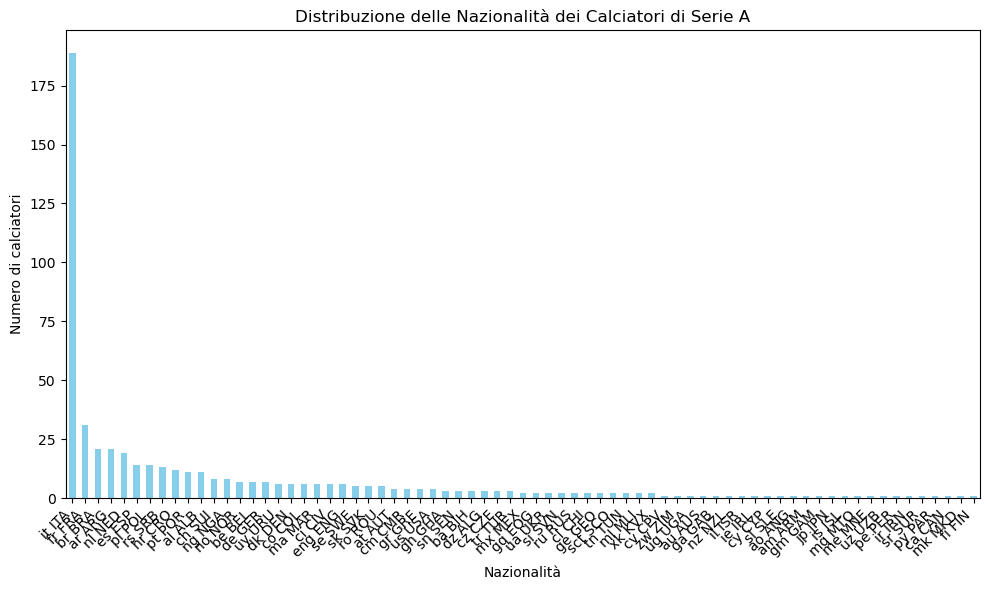

In [29]:
#istogramma nazionalità
nazionalita = data.iloc[:, 1]

# Conta il numero di calciatori per ciascuna nazionalità
nazionalita_counts = nazionalita.value_counts()

# Crea l'istogramma
fig, ax = plt.subplots(figsize=(10, 6))
nazionalita_counts.plot(kind='bar', ax=ax, color='skyblue')

# Aggiungi i titoli e le etichette
ax.set_title('Distribuzione delle Nazionalità dei Calciatori di Serie A')
ax.set_xlabel('Nazionalità')
ax.set_ylabel('Numero di calciatori')

# Ruota le etichette sull'asse x per una migliore leggibilità
plt.xticks(rotation=45, ha='right')

# Mostra il grafico
plt.tight_layout()
plt.show()

In [30]:
import pandas as pd
import re

# Leggi il file Excel
data = pd.read_excel(r"C:\Users\milan\OneDrive\Documenti\stipendisquadre.xlsx")

# Estrai le colonne necessarie: quarta colonna (Squadra) e sesta colonna (Stipendio)
squadre_colonna = data.columns[3]
stipendi_colonna = data.columns[5]

# Funzione per pulire la colonna degli stipendi
def pulisci_stipendio(stipendio):
    solo_numeri = re.findall(r'[\d,.]+', stipendio)
    if solo_numeri:
        return float(solo_numeri[0].replace(',', '').replace('.', ''))
    return 0

# Applicare la funzione di pulizia alla colonna degli stipendi
data['Stipendio Pulito'] = data[stipendi_colonna].apply(pulisci_stipendio)

# Rimuovi eventuali spazi bianchi dai nomi delle squadre
data[squadre_colonna] = data[squadre_colonna].str.strip()

# Calcola la media degli stipendi per ogni squadra
media_stipendi_per_squadra = data.groupby(squadre_colonna)['Stipendio Pulito'].mean()

# Ordinare le squadre dalla media degli stipendi più alta alla più bassa
classifica_squadre = media_stipendi_per_squadra.sort_values(ascending=False)

# Rendi i valori degli stipendi più leggibili
classifica_squadre = classifica_squadre.apply(lambda x: f"{x:,.2f}")

# Mostra la classifica delle squadre
print(classifica_squadre)

Squad
Juventus         5,648,571.43
Inter            5,528,095.24
Roma             4,653,809.52
Milan            3,855,714.29
Napoli           3,714,285.71
Lazio            3,178,181.82
Fiorentina       2,619,047.62
Atalanta         1,924,000.00
Torino           1,789,523.81
Genoa            1,529,523.81
Sassuolo         1,481,428.57
Salernitana      1,319,047.62
Monza            1,270,476.19
Cagliari         1,210,476.19
Bologna          1,205,500.00
Hellas Verona    1,140,952.38
Udinese          1,128,571.43
Empoli           1,054,000.00
Frosinone          859,047.62
Lecce              699,047.62
Name: Stipendio Pulito, dtype: object


In [31]:

squadre_colonna = data.columns[3]
eta_colonna = data.columns[4]

# Calcola la media delle età per ogni squadra
media_eta_per_squadra = data.groupby(squadre_colonna)[eta_colonna].mean()

# Ordina le squadre dalla più giovane alla più vecchia
classifica_eta = media_eta_per_squadra.sort_values(ascending=True)

# Mostra la classifica delle squadre
print(classifica_eta)


Squad
Lecce            24.761905
Frosinone        25.000000
Bologna          25.350000
Torino           25.619048
Fiorentina       26.190476
Milan            26.238095
Hellas Verona    26.380952
Genoa            26.476190
Napoli           26.523810
Udinese          26.666667
Sassuolo         26.809524
Atalanta         26.900000
Monza            27.142857
Juventus         27.190476
Empoli           27.450000
Lazio            27.545455
Cagliari         27.666667
Roma             27.714286
Salernitana      27.809524
Inter            28.857143
Name: Age, dtype: float64
